In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
air = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/air_quality_no2_long.csv")
air

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,microgram per m^3
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,microgram per m^3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,microgram per m^3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,microgram per m^3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,microgram per m^3
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,microgram per m^3
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,microgram per m^3
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,microgram per m^3
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,microgram per m^3


In [3]:
# 정보확인
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [4]:
# 결측치 확인
air.isna().sum(axis=0)

city         0
country      0
date.utc     0
location     0
parameter    0
value        0
unit         0
dtype: int64

In [5]:
# 이상치 확인
cols = ['city', 'country', 'date.utc', 'location', 'parameter', 'unit']
(air[cols] == 0).sum(axis=0)

city         0
country      0
date.utc     0
location     0
parameter    0
unit         0
dtype: int64

In [6]:
# 범주별 데이터수
air['value'].value_counts()

26.0    66
25.0    46
33.0    44
31.0    43
29.0    43
        ..
14.8     1
79.4     1
34.8     1
91.8     1
62.0     1
Name: value, Length: 458, dtype: int64

In [7]:
air

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,microgram per m^3
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,microgram per m^3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,microgram per m^3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,microgram per m^3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,microgram per m^3
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,microgram per m^3
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,microgram per m^3
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,microgram per m^3
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,microgram per m^3


In [8]:
air.drop(['parameter', 'unit', 'date.utc'], axis=1, inplace=True)
air

,city,country,location,value
0,Paris,FR,FR04014,20.0
1,Paris,FR,FR04014,21.8
2,Paris,FR,FR04014,26.5
3,Paris,FR,FR04014,24.9
4,Paris,FR,FR04014,21.4
...,...,...,...,...
2063,London,GB,London Westminster,26.0
2064,London,GB,London Westminster,16.0
2065,London,GB,London Westminster,19.0
2066,London,GB,London Westminster,19.0


In [11]:
# 범주형 변수 레이블 인코딩
labels = []
encoder = LabelEncoder()
items = list(air['city'])
encoder.fit(items)
labels = encoder.transform(items)
air['city'] = labels

In [12]:
# 범주형 변수 레이블 인코딩
labels = []
encoder = LabelEncoder()
items = list(air['country'])
encoder.fit(items)
labels = encoder.transform(items)
air['country'] = labels

In [13]:
# 범주형 변수 레이블 인코딩
labels = []
encoder = LabelEncoder()
items = list(air['location'])
encoder.fit(items)
labels = encoder.transform(items)
air['location'] = labels

In [14]:
# 특성과 레이블 분리
X_data = air.drop(['value'], axis=1)
X_data.head()

,city,country,location
0,2,1,1
1,2,1,1
2,2,1,1
3,2,1,1
4,2,1,1


In [15]:
y_data = air['value']
y_data.head()

0    20.0
1    21.8
2    26.5
3    24.9
4    21.4
Name: value, dtype: float64

In [16]:
# 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [21]:
mse

204.8322847588307

In [22]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.010661783716382378
-0.0016780514334395757


다른팀 코드

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/air_quality_no2_long.csv')
df['value'].describe()

## 미세먼지 수치에 따라서 라벨 나누기 ##
df['air_quality'] = pd.cut(df['value'], bins=[-float('inf'), 30, 60, float('inf')], labels=[0, 1, 2], right=False).astype(int)
df.isnull().sum()
df.info()

df['date.utc'] = pd.to_datetime(df['date.utc'])

# 각 구성 요소를 One-Hot 인코딩
df = pd.concat([df, df['date.utc'].dt.year.rename('year'),
                df['date.utc'].dt.month.rename('month'),
                df['date.utc'].dt.day.rename('day'),
                df['date.utc'].dt.hour.rename('hour'),
                df['date.utc'].dt.minute.rename('minute'),
                df['date.utc'].dt.second.rename('second'),
                pd.get_dummies(df['date.utc'].dt.tz, prefix='timezone')], axis=1)

# 'date.utc' 열 삭제
df = df.drop(columns=['date.utc', 'timezone_UTC'])

col= df.select_dtypes('object').columns.values
print(col)

df = pd.get_dummies(df, columns=col)

X_data = df.drop(['air_quality'], axis=1)
y_data = df['air_quality']

y_data.value_counts()

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

#y_train_int = LabelEncoder().fit_transform(y_train)

y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(36,input_dim=18, activation='relu'))
  model.add(layers.Dense(24, activation='relu'))
  model.add(layers.Dense(12, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(3, activation='softmax'), )
  return model

model = build_model()
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(Xtrain_s, y_train_onehot, epochs=100, batch_size=16, validation_data=(X_test_s, y_test_onehot))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         2068 non-null   object 
 1   country      2068 non-null   object 
 2   date.utc     2068 non-null   object 
 3   location     2068 non-null   object 
 4   parameter    2068 non-null   object 
 5   value        2068 non-null   float64
 6   unit         2068 non-null   object 
 7   air_quality  2068 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 129.4+ KB
['city' 'country' 'location' 'parameter' 'unit']
(1654, 18) (414, 18)
(1654,) (414,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                684       
                                                                 
 dense_1 (Dense)             (None, 24)  

In [24]:
# 학습곡선 그리기

import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],label='Val Accuracy')
  plt.legend()

  plt.show()

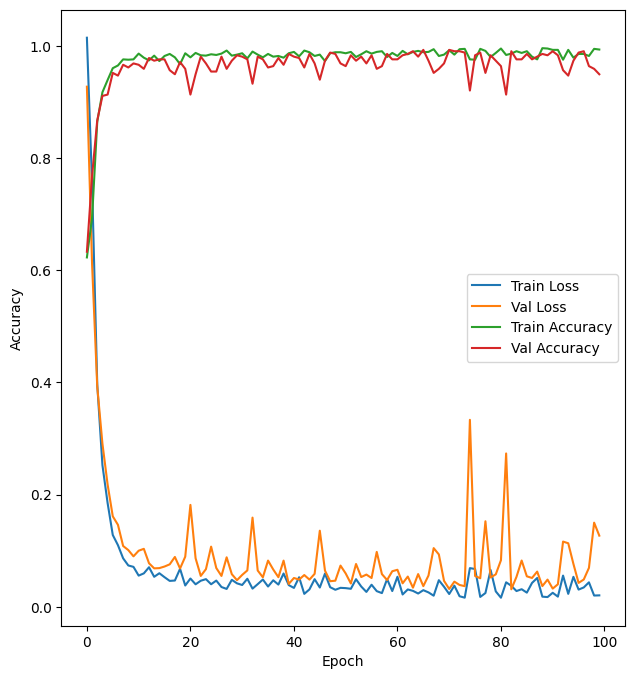

In [25]:
plot_history(history)